### 🌆 City Map Generator

This Python program creates a **colorful city map** with roads, sidewalks, buildings, and a legend that explains what each building represents. It uses the **Pillow (PIL)** library to draw and save the map as an image.

The program works in several steps:

1. **Setup and Canvas Creation**
   It defines both the size of the map and the colors for the background, roads, sidewalks, and road lines. A blank image is created to serve as the “canvas.”

2. **Drawing Roads**
   A special function draws horizontal and vertical roads with sidewalks and dashed center lines. The code calculates where each road should go, forming a grid that looks like a small city layout.

3. **Placing Buildings**
   Ten different building types (like a **Hospital**, **Cafe**, **Library**, or **School**) are added to the spaces between roads. Each building has its own color, design, and placement rules (for example, the hospital is centered, while the garage sits at the bottom of its intersection).

4. **Adding Street Names and Legend**
   Each road is labeled with its name (for example, *North Street* or *Maple Road*). A **legend** is drawn on the side of the map showing all building names and their matching icons and colors.

5. **Saving and Displaying the Map**
   The finished map is saved as an image file called **“map_with_buildings_and_legend.png.”** The code can display the image directly in Python or print a simplified preview in the terminal.

---

### 🧠 Purpose and Use

This code can be used to:

* **Generate visual maps** for games, simulations, or city-planning projects.
* **Practice Python graphics** and image drawing with the Pillow library.
* **Explore randomness and positioning** in visual layouts.

It’s a great project for learning how programming can combine **art, geometry, and logic** to create interactive or visual results.


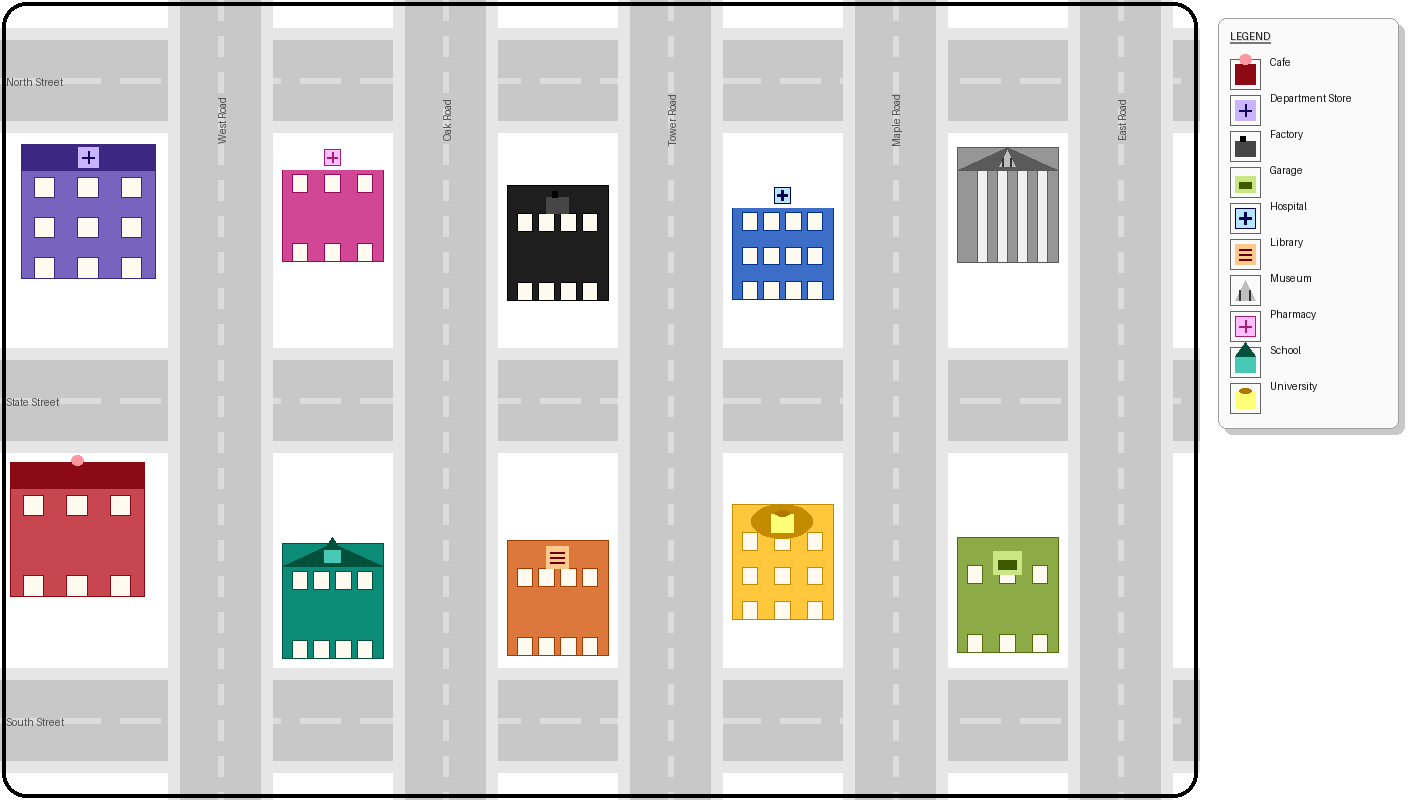

           .:::::.        .:::::.        .:::::.        .:::::.        .:::::.  
:::::::::::.:::::.::::::::.:::::.::::::::.:::::.::::::::.:::::.::::::::.:::::.::
:::::::::::.:::::.::::::::.:::::.::::::::.:::::.::::::::.:::::.::::::::.:::::.::
:::::::::::.:::::.::::::::.:::::.::::::::.:::::.::::::::.:::::.::::::::.:::::.::
           .:::::.        .:::::.        .:::::.        .:::::.        .:::::.  
 ######### .:::::.        .:::::.        .:::::.        .:::::. ******=.:::::.  
 +++++++++ .:::::. +++++++.:::::. %%##%%%.:::::.    .   .:::::. = *=* =.:::::.  
 +  +  + + .:::::. +++++++.:::::. @@  % %.:::::. %%%%+%+.:::::. = *=* =.:::::.  
 +  +  + + .:::::. #######.:::::. %%%%%%%.:::::. %%  + +.:::::. = *=* =.:::::.  
           .:::::.        .:::::. @@  % %.:::::. %%  + +.:::::.        .:::::.  
           .:::::.        .:::::.        .:::::.        .:::::.        .:::::.  
............:::::..........:::::..........:::::..........:::::..........:::::...
:::::::::::.:::::.::::::::.:

In [1]:
# --- Imports and Setup ---
from PIL import Image, ImageDraw, ImageFont
import random

# --- Canvas and Color Setup ---
W, H = 1200, 800  # Map size
BACKGROUND = (255, 255, 255)   # Map background color
ROAD = (200, 200, 200)         # Road color
SIDEWALK = (230, 230, 230)     # Sidewalk color
CENTER_LINE = (220, 220, 220)  # Road center line color

img = Image.new("RGB", (W, H), BACKGROUND)
draw = ImageDraw.Draw(img)

# --- Road Drawing Function ---
def draw_axis_aligned_road(draw, x1, y1, x2, y2, road_w=120, sidewalk_w=20):
    """
    Draws horizontal or vertical roads with sidewalks and dashed center lines.
    """
    if x1 == x2:  # vertical
        left = x1 - road_w // 2
        right = x1 + road_w // 2
        draw.rectangle([left - sidewalk_w, 0, left, H], fill=SIDEWALK)
        draw.rectangle([right, 0, right + sidewalk_w, H], fill=SIDEWALK)
        draw.rectangle([left, 0, right, H], fill=ROAD)
        cx = x1
        dash_h, gap_h = 20, 16
        y = 0
        while y < H:
            draw.line([(cx, y), (cx, min(H, y + dash_h))], fill=CENTER_LINE, width=6)
            y += dash_h + gap_h
    elif y1 == y2:  # horizontal
        top = y1 - road_w // 2
        bottom = y1 + road_w // 2
        draw.rectangle([0, top - sidewalk_w, W, top], fill=SIDEWALK)
        draw.rectangle([0, bottom, W, bottom + sidewalk_w], fill=SIDEWALK)
        draw.rectangle([0, top, W, bottom], fill=ROAD)
        cy = y1
        dash_w, gap_w = 40, 20
        x = 0
        while x < W:
            draw.line([(x, cy), (min(W, x + dash_w), cy)], fill=CENTER_LINE, width=6)
            x += dash_w + gap_w
    else:
        raise ValueError("Only horizontal or vertical roads supported.")

# --- Road Grid Calculation ---
num_horiz, num_vert = 3, 5
ROAD_WIDTH, SIDEWALK_WIDTH = 80, 12
margin = max(ROAD_WIDTH, int(min(W, H) * 0.1))
usable_h = H - 2 * margin
usable_w = W - 2 * margin
horiz_positions = [margin + int(usable_h * i / (num_horiz - 1)) for i in range(num_horiz)]
initial_vert_positions = [margin + int(usable_w * i / (num_vert - 1)) for i in range(num_vert)]

# Evenly space West..East using explicit anchors for West and East
WEST_X = 220  # desired West Road position
EAST_X = initial_vert_positions[-1]
vert_positions = [int(round(WEST_X + (EAST_X - WEST_X) * i / (num_vert - 1))) for i in range(num_vert)]

horiz_names = ["North Street", "State Street", "South Street"]
vert_names = ["West Road", "Oak Road", "Tower Road", "Maple Road", "East Road"]

# --- Draw Roads ---
for y in horiz_positions:
    draw_axis_aligned_road(draw, 0, y, W, y, road_w=ROAD_WIDTH, sidewalk_w=SIDEWALK_WIDTH)
for x in vert_positions:
    draw_axis_aligned_road(draw, x, 0, x, H, road_w=ROAD_WIDTH, sidewalk_w=SIDEWALK_WIDTH)

# --- Building and Legend Drawing ---
def add_buildings_and_legend(img, draw, horiz_roads, vert_roads):
    """
    Place exactly one building on each chosen sidewalk block, ensuring all 10 types are used.
    Buildings are near-square and almost uniform. Each type is anchored within its assigned 
    sidewalk block (e.g. Hospital=center, Garage=bottom, Library=bottom-left) with a small 
    jitter to preserve staggered layout.
    Legend is alphabetized, the title is underlined, and there is extra space between the 
    title and the items.
    """
    W, H = img.size

    # --- Building Colors and Types ---
    # Color palette (stable)
    body_colors = [
        (200, 70, 80),   # red (Cafe)
        (60, 110, 200),  # blue
        (30, 30, 30),    # dark
        (140, 170, 70),  # green
        (120, 100, 190), # purple
        (220, 120, 60),  # orange
        (150, 150, 150), # gray
        (210, 70, 150),  # pink
        (10, 140, 120),  # teal
        (255, 200, 60)   # yellow
    ]
    def _darken(col, amt=40): return tuple(max(0, c-amt) for c in col)
    def _lighten(col, amt=40): return tuple(min(255, c+amt) for c in col)
    building_types = [
        ("Cafe"
         , lambda d, x, y, r, color=None: 
         [d.rectangle([x-r//2, y-r//2, x+r//2, y+r//2]
                      , fill=_darken(color, 60)), d.ellipse(
             [x-r//3, y-r, x+r//3, y-r//2], fill=_lighten(color, 80))]),
        ("Department Store"
         , lambda d, x, y, r, color=None: 
         [d.rectangle([x-r//2, y-r//2, x+r//2, y+r//2]
                      , fill=_lighten(color, 80)), d.line(
             [(x-r//3, y), (x+r//3, y)], fill=_darken(color, 100), width=2)
          , d.line([(x, y-r//3), (x, y+r//3)], fill=_darken(color, 100), width=2)]),
        ("Factory"
         , lambda d, x, y, r, color=None: 
         [d.rectangle([x-r//2, y-r//4, x+r//2, y+r//2]
                      , fill=_lighten(color, 40)), d.rectangle(
             [x-r//4, y-r//2, x, y-r//4], fill=_darken(color, 80))]),
        ("Garage"
         , lambda d, x, y, r, color=None: 
         [d.rectangle([x-r//2, y-r//3, x+r//2, y+r//2]
                      , fill=_lighten(color, 60)), d.rectangle(
             [x-r//3, y, x+r//3, y+r//3], fill=_darken(color, 80))]),
        ("Hospital"
         , lambda d, x, y, r, color=None: 
         [d.rectangle([x-r//2, y-r//2, x+r//2, y+r//2]
                      , fill=_lighten(color, 120), outline=_darken(color, 120))
          , d.line([(x, y-r//3), (x, y+r//3)], fill=_darken(color, 120), width=3)
          , d.line([(x-r//3, y), (x+r//3, y)], fill=_darken(color, 120), width=3)]),
        ("Library"
         , lambda d, x, y, r, color=None: 
         [d.rectangle([x-r//2, y-r//2, x+r//2, y+r//2], fill=_lighten(color, 80))
          , d.line([(x-r//3, y-r//4), (x+r//3, y-r//4)], fill=_darken(color, 120)
                   , width=2), d.line([(x-r//3, y), (x+r//3, y)], fill=_darken(color, 120)
                                      , width=2), d.line([(x-r//3, y+r//4), (x+r//3, y+r//4)]
                                                         , fill=_darken(color, 120), width=2)]),
        ("Museum"
         , lambda d, x, y, r, color=None: 
         [d.polygon([(x, y-r//2), (x-r//2, y+r//2), (x+r//2, y+r//2)]
                    , fill=_lighten(color, 40)), d.line([(x-r//4, y+r//2), (x-r//4, y)]
                                                        , fill=_darken(color, 100), width=2)
          , d.line([(x+r//4, y+r//2), (x+r//4, y)], fill=_darken(color, 100), width=2)]),
        ("Pharmacy"
         , lambda d, x, y, r, color=None: [d.rectangle([x-r//2, y-r//2, x+r//2, y+r//2]
                                                       , fill=_lighten(color, 120)
                                                       , outline=_darken(color, 40))
                                           , d.line([(x, y-r//3), (x, y+r//3)], fill=_darken(color, 40)
                                                    , width=2), d.line([(x-r//3, y), (x+r//3, y)]
                                                                       , fill=_darken(color, 40)
                                                                       , width=2)]),
        ("School"
         , lambda d, x, y, r, color=None: 
         [d.rectangle([x-r//2, y-r//3, x+r//2, y+r//2]
                      , fill=_lighten(color, 60)), d.polygon([(x-r//2, y-r//3), (x, y-r)
                                                              , (x+r//2, y-r//3)]
                                                             , fill=_darken(color, 60))]),
        ("University"
         , lambda d, x, y, r, color=None: 
         [d.rectangle([x-r//2, y-r//3, x+r//2, y+r//2]
                      , fill=_lighten(color, 60))
          , d.ellipse([x-r//3, y-r//2, x+r//3, y-r//4], fill=_darken(color, 80))])
    ]
    # Keep a stable label list
    labels = [name for name, _ in building_types]

    # Map colors
    type_to_color = {
        'Cafe': body_colors[0],
        'Hospital': body_colors[1],
        'Factory': body_colors[2],
        'Garage': body_colors[3],
        'Department Store': body_colors[4],
        'Library': body_colors[5],
        'Museum': body_colors[6],
        'Pharmacy': body_colors[7],
        'School': body_colors[8],
        'University': body_colors[9]
    }

    random.seed(42)

    # Base minimums for legibility
    min_b_w, min_b_h = 64, 64

    # --- Compute raw sidewalk block gaps (independent of building size) ---
    pad = 10  # inner padding from sidewalk edges
    horizontal_gaps = []  # (y_start, y_end) between horizontal roads
    for i in range(len(horiz_positions) - 1):
        y_start = horiz_positions[i] + ROAD_WIDTH // 2 + SIDEWALK_WIDTH + pad
        y_end = horiz_positions[i + 1] - ROAD_WIDTH // 2 - SIDEWALK_WIDTH - pad
        horizontal_gaps.append((y_start, y_end))
        
    # top/bottom outer blocks
    horizontal_gaps.insert(0, (pad, horiz_positions[0] - ROAD_WIDTH // 2 - SIDEWALK_WIDTH - pad))
    horizontal_gaps.append((horiz_positions[-1] + ROAD_WIDTH // 2 + SIDEWALK_WIDTH + pad, H - pad))
    # filter invalid
    horizontal_gaps = [(y1, y2) for (y1, y2) in horizontal_gaps if y2 - y1 > 0]

    vertical_gaps = []  # (x_start, x_end) between vertical roads
    for i in range(len(vert_positions) - 1):
        x_start = vert_positions[i] + ROAD_WIDTH // 2 + SIDEWALK_WIDTH + pad
        x_end = vert_positions[i + 1] - ROAD_WIDTH // 2 - SIDEWALK_WIDTH - pad
        vertical_gaps.append((x_start, x_end))
        
    # left/right outer blocks
    vertical_gaps.insert(0, (pad, vert_positions[0] - ROAD_WIDTH // 2 - SIDEWALK_WIDTH - pad))
    vertical_gaps.append((vert_positions[-1] + ROAD_WIDTH // 2 + SIDEWALK_WIDTH + pad, W - pad))
    vertical_gaps = [(x1, x2) for (x1, x2) in vertical_gaps if x2 - x1 > 0]

    # --- Choose exactly len(building_types) distinct blocks (one per building) ---
    blocks = []  # each as (bx1, by1, bx2, by2)
    for (x1, x2) in vertical_gaps:
        for (y1, y2) in horizontal_gaps:
            bw_available = x2 - x1
            bh_available = y2 - y1
            if bw_available >= min_b_w and bh_available >= min_b_h:
                blocks.append((x1, y1, x2, y2))
    total_needed = len(building_types)  # 10
    if len(blocks) < total_needed:
        chosen_blocks = blocks
    else:
        chosen_blocks = random.sample(blocks, total_needed)  # random subset without replacement

    # --- Placement preference per building type ---
    placement_pref = {
        'Cafe': 'top_left',
        'Department Store': 'top_right',
        'Factory': 'center_left',
        'Garage': 'bottom',
        'Hospital': 'center',
        'Library': 'bottom_left',
        'Museum': 'top_center',
        'Pharmacy': 'top',
        'School': 'bottom_right',
        'University': 'center_right'
    }

    # --- Compute a near-uniform size factor to make buildings almost the same size ---
    global_fill = random.uniform(0.78, 0.82)  # same fraction applied to all chosen blocks
    positions = []  # will be in same order as chosen_blocks so we can map to types by index
    jitter_px = 6
    for idx, (bx1, by1, bx2, by2) in enumerate(chosen_blocks):
        label, _ = building_types[idx]
        avail_w, avail_h = (bx2 - bx1), (by2 - by1)
        
        # compute near-square size using the same fill fraction for uniformity; ensure min/max clamps
        cur_bw = max(min_b_w, int(avail_w * global_fill))
        cur_bh = max(min_b_h, int(avail_h * global_fill))
        
        # Enforce a squareish shape: make width/height closer by averaging relative sizes
        target_side = int((cur_bw + cur_bh) / 2)
        # cap to available dims
        cur_bw = min(target_side, avail_w)
        cur_bh = min(target_side, avail_h)
        
        # Choose placement anchor for this type
        pref = placement_pref.get(label, 'center')
        if pref == 'center':
            ox = bx1 + (avail_w - cur_bw)//2
            oy = by1 + (avail_h - cur_bh)//2
        elif pref == 'top_left':
            ox = bx1
            oy = by1
        elif pref == 'top_right':
            ox = bx2 - cur_bw
            oy = by1
        elif pref == 'top_center':
            ox = bx1 + (avail_w - cur_bw)//2
            oy = by1
        elif pref == 'bottom':
            ox = bx1 + (avail_w - cur_bw)//2
            oy = by2 - cur_bh
        elif pref == 'bottom_left':
            ox = bx1
            oy = by2 - cur_bh
        elif pref == 'bottom_right':
            ox = bx2 - cur_bw
            oy = by2 - cur_bh
        elif pref == 'center_left':
            ox = bx1
            oy = by1 + (avail_h - cur_bh)//2
        elif pref == 'center_right':
            ox = bx2 - cur_bw
            oy = by1 + (avail_h - cur_bh)//2
        elif pref == 'top':
            ox = bx1 + (avail_w - cur_bw)//2
            oy = by1
        else:
            ox = bx1 + (avail_w - cur_bw)//2
            oy = by1 + (avail_h - cur_bh)//2
            
        # small random jitter but stay inside block
        ox += random.randint(-jitter_px, jitter_px) if avail_w - cur_bw > jitter_px*2 else 0
        oy += random.randint(-jitter_px, jitter_px) if avail_h - cur_bh > jitter_px*2 else 0
        ox = max(bx1, min(ox, bx2 - cur_bw))
        oy = max(by1, min(oy, by2 - cur_bh))
        positions.append((ox, oy, ox + cur_bw, oy + cur_bh))

    # --- Draw Buildings (one per type, in stable type order) ---
    def draw_building(draw_ctx, bbox, type_idx):
        x1, y1, x2, y2 = bbox
        label, icon_func = building_types[type_idx]
        body = type_to_color.get(label, body_colors[type_idx % len(body_colors)])
        outline = tuple(max(0, c-60) for c in body)
        draw_ctx.rectangle([x1, y1, x2, y2], fill=body, outline=outline)
        cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
        w, h = x2 - x1, y2 - y1
        def draw_windows(rows, cols):
            win_w, win_h = w * 0.15, h * 0.15
            margin_x, margin_y = w * 0.1, h * 0.25
            spacing_x = (w - 2 * margin_x - win_w) / (cols - 1) if cols > 1 else 0
            spacing_y = (h - margin_y - win_h) / (rows - 1) if rows > 1 else 0
            for row in range(rows):
                for col in range(cols):
                    wx = x1 + margin_x + col * spacing_x
                    wy = y1 + margin_y + row * spacing_y
                    draw_ctx.rectangle([wx, wy, wx + win_w, wy + win_h], fill=(255, 250, 240)
                                       , outline=outline)
                    
        # Draw type-specific details by type_idx
        if type_idx == 0: 
            draw_windows(2, 3); 
            draw_ctx.rectangle([x1, y1, x2, y1 + h * 0.2], fill=outline); 
            icon_func(draw_ctx, cx, y1 + h * 0.1, h * 0.15, body)  # Cafe
        elif type_idx == 1: 
            draw_windows(3, 3); 
            draw_ctx.rectangle([x1, y1, x2, y1 + h * 0.2], fill=outline); 
            icon_func(draw_ctx, cx, y1 + h * 0.1, h * 0.15, body)  # Department Store
        elif type_idx == 2: 
            draw_windows(2, 4); 
            icon_func(draw_ctx, cx, y1 + h * 0.15, h * 0.2, body)  # Factory
        elif type_idx == 3: 
            draw_windows(2, 3); 
            icon_func(draw_ctx, cx, y1 + h * 0.2, h * 0.25, body)  # Garage
        elif type_idx == 4: 
            draw_windows(3, 4);
            draw_ctx.rectangle([x1, y1, x2, y1 + h * 0.2], fill=(255, 255, 255)); 
            icon_func(draw_ctx, cx, y1 + h * 0.1, h * 0.15, body)  # Hospital
        elif type_idx == 5: 
            draw_windows(2, 4); 
            icon_func(draw_ctx, cx, y1 + h * 0.15, h * 0.2, body)  # Library
        elif type_idx == 6: 
            col_w = w * 0.1; 
            [draw_ctx.rectangle([x1 + w * (0.2 + i * 0.2), y1 + h * 0.2, x1 + w * (0.2 + i * 0.2) 
                                 + col_w, y2], fill=(240, 240, 240), outline=outline) for i in range(4)]; 
            draw_ctx.polygon([(x1, y1 + h * 0.2), (cx, y1), (x2, y1 + h * 0.2)], fill=outline); 
            icon_func(draw_ctx, cx, y1 + h * 0.1, h * 0.15, body)  # Museum
        elif type_idx == 7:
            draw_windows(2, 3); 
            draw_ctx.rectangle([x1, y1, x2, y1 + h * 0.2], fill=(255, 255, 255)); 
            icon_func(draw_ctx, cx, y1 + h * 0.1, h * 0.15, body)  # Pharmacy
        elif type_idx == 8: 
            draw_windows(2, 4); 
            draw_ctx.polygon([(x1, y1 + h * 0.2), (cx, y1), (x2, y1 + h * 0.2)], fill=outline); 
            icon_func(draw_ctx, cx, y1 + h * 0.1, h * 0.15, body)  # School
        else: draw_windows(3, 3); draw_ctx.ellipse([cx - w * 0.3, y1, cx + w * 0.3, y1 + h * 0.3]
                                                   , fill=outline); icon_func(draw_ctx, cx, y1 + h 
                                                                * 0.15, h * 0.2, body)  # University
    for type_idx in range(min(len(positions), len(building_types))):
        draw_building(draw, positions[type_idx], type_idx)

    # --- Draw Street Names ---
    def _text_size(draw_ctx, text, fnt):
        try: bbox = draw_ctx.textbbox((0, 0), text, font=fnt); return (bbox[2] - bbox[0]
                                                                       , bbox[3] - bbox[1])
        except Exception: return fnt.getsize(text) if hasattr(fnt, 'getsize') else (len(text) * 6, 11)
    def draw_rotated_text(base_img, text, center, angle, font, fill=(40,40,40)):
        tw, th = _text_size(ImageDraw.Draw(base_img), text, font)
        tmp = Image.new("RGBA", (tw + 8, th + 8), (0,0,0,0))
        tmp_draw = ImageDraw.Draw(tmp)
        tmp_draw.text((4,4), text, font=font, fill=fill)
        rot = tmp.rotate(angle, expand=1)
        bx = int(center[0] - rot.width // 2)
        by = int(center[1] - rot.height // 2)
        base_img.paste(rot, (bx, by), rot)
    font = None
    try:
        font = ImageFont.truetype("arial.ttf", 24)
    except Exception:
        font = ImageFont.load_default()
    label_font = font
    
    # Position horizontal names at the left border, preserve y
    inset_left = 6
    inset_top = W * 0.1
    for yc, rw, sw, name in horiz_roads:
        tw, th = _text_size(draw, name, label_font)
        draw.text((inset_left, yc - th//2), name, fill=(80,80,80), font=label_font)
    for xc, rw, sw, name in vert_roads:
        draw_rotated_text(img, name, (xc, inset_top), 90, label_font, fill=(80,80,80))

    # --- Draw Legend (alphabetical, consistent colors) ---
    pad, title, left_pad, example_size, gap_between_icon_and_label = 18, "LEGEND", 12, 30, 8
    
    # Prepare sorted list with original indices for consistent colors
    sorted_types = sorted([(lbl, fn, idx) for idx, (lbl, fn) in enumerate(building_types)]
                          , key=lambda t: t[0])
    ttw, tth = _text_size(draw, title, font)
    max_label_w = max(_text_size(draw, lbl, font)[0] for (lbl, _, _) in sorted_types)
    legend_w = max(180, left_pad + example_size + gap_between_icon_and_label + max(ttw, max_label_w)
                   + left_pad)
    total_w = W + legend_w + pad * 2
    final_img = Image.new("RGB", (total_w, H), BACKGROUND)
    final_img.paste(img, (0, 0))
    draw_final = ImageDraw.Draw(final_img)
    border_thickness, border_radius, border_inset = 4, 24, 2
    mx1, my1 = border_inset, border_inset
    mx2, my2 = W - 1 - border_inset, H - 1 - border_inset
    try:
        draw_final.rounded_rectangle([mx1, my1, mx2, my2], outline=(0, 0, 0), width=border_thickness
                                     , radius=border_radius)
    except Exception:
        draw_final.rectangle([mx1, my1, mx2, my2], outline=(0, 0, 0), width=border_thickness)
    num_items = len(sorted_types)
    
    # Add extra space between title and items per request
    title_top, item_spacing = 12, 36
    items_top = title_top + tth + 18 
    legend_h = items_top + num_items * item_spacing + 12
    lx1, ly1 = W + pad, pad
    lx2, ly2 = W + pad + legend_w, ly1 + int(legend_h)
    shadow_off, legend_radius = 6, 8
    
    try:
        draw_final.rounded_rectangle([lx1 + shadow_off, ly1 + shadow_off, lx2 + shadow_off
                                      , ly2 + shadow_off], fill=(200, 200, 200), radius=legend_radius)
    except Exception:
        draw_final.rectangle([lx1 + shadow_off, ly1 + shadow_off, lx2 + shadow_off, ly2 + shadow_off]
                             , fill=(200, 200, 200))
    try:
        draw_final.rounded_rectangle([lx1, ly1, lx2, ly2], fill=(250, 250, 250), outline=(160,160,160)
                                     , radius=legend_radius)
    except Exception:
        draw_final.rectangle([lx1, ly1, lx2, ly2], fill=(250, 250, 250), outline=(160,160,160))
    title_x, title_y = lx1 + 12, ly1 + title_top
    
    # Draw title and underline it
    draw_final.text((title_x + 1, title_y + 1), title, font=font, fill=(200,200,200))
    draw_final.text((title_x, title_y), title, font=font, fill=(30,30,30))
    underline_y = title_y + tth + 4
    draw_final.line([title_x, underline_y, title_x + ttw, underline_y], fill=(120,120,120), width=2)
    for i, (label, icon_func, original_idx) in enumerate(sorted_types):
        ey = ly1 + items_top + i * item_spacing
        sw = lx1 + 12
        sh = ey + 8
        draw_final.rectangle([sw, sh - 5, sw + example_size, sh + example_size - 5]
                             , fill=(250,250,250), outline=(100,100,100))
        icon_color = type_to_color.get(label, body_colors[original_idx])
        icon_func(draw_final, sw + example_size//2, sh + example_size//2 - 5
                  , example_size - 10, icon_color)
        draw_final.text((sw + example_size + 10, ey), label, fill=(20,20,20), font=font)
    return final_img

# --- Road Metadata for Building Placement and Labels ---
horiz_roads = [(y, 140 if i == num_horiz // 2 else 80, 18 if i == num_horiz // 2 else 12
                , horiz_names[i]) for i, y in enumerate(horiz_positions)]
center_idx = min(range(len(vert_positions)), key=lambda j: abs(vert_positions[j] - W//2))
vert_roads = [(x, 140 if i == center_idx else 80, 18 if i == center_idx else 12, vert_names[i]) 
              for i, x in enumerate(vert_positions)]

# --- Generate Map and Save ---
final = add_buildings_and_legend(img, draw, horiz_roads, vert_roads)

# --- Display Map Inline or in Viewer ---
try:
    from IPython.display import display
    display(final)
except Exception:
    final.show()

# --- Terminal Preview (Optional) ---
def print_map_terminal(image, max_width=80):
    """Print a downsampled colored preview of the image to a terminal."""
    try:
        import sys
        if not sys.stdout.isatty():
            small = image.resize((min(max_width, image.width)
                                  , max(1, int(image.height * min(max_width
                                            , image.width) / image.width * 0.5)))
                                 , Image.NEAREST).convert("L")
            chars = "@%#*+=-:. "
            w, h = small.size
            for y in range(h):
                row = ""
                for x in range(w):
                    g = small.getpixel((x, y))
                    row += chars[int(g / 256 * len(chars))]
                print(row)
            return
    except Exception:
        pass
    new_w = min(max_width, image.width)
    aspect_correction = 0.5
    new_h = max(1, int(image.height * new_w / image.width * aspect_correction))
    thumb = image.resize((new_w, new_h), Image.NEAREST).convert("RGB")
    RESET = "\x1b[0m"
    for y in range(new_h):
        line = []
        for x in range(new_w):
            r, g, b = thumb.getpixel((x, y))
            line.append(f"\x1b[48;2;{r};{g};{b}m  ")
        line.append(RESET)
        print("".join(line))

# Print small preview to terminal
print_map_terminal(img, max_width=80)

<div style="color:white;display:fill;border-radius:12px;
            background-color:#005bbb;font-size:150%;
            font-family:Georgia;letter-spacing:0.5px">
    <p style="color:gold;text-align:center"><b>- THANK YOU -</b></p>
</div>

<p>
<h3><font color="#bc4749">If you like this notebook, please upvote and leave a comment. Your feedback is greatly appreciated.</font></h3>

<h4><b>Author :</b> Sonya Lawrence</h4>

👉Let's chat : [Twitter](https://twitter.com/Sonya_Lawrence1)      
👉Connect with me : [LinkedIn](https://www.linkedin.com/in/sonya-lt/)      
👉Explore my projects : [Github](https://github.com/sonya-7)      
👉View my portfolio : [Website](https://sonyalt.vercel.app/)